<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_and_Inference_Starter_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive and Inferencial Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

- **Descriptive Statistics:** A basic low level summary of what I can do with the dataset in front of me. Such as the mean, median, mode, standard diviation, and how much varience there is.

- **Inferencial Statistics:** What can I figure out about unknown data by using the data that's right in front of me. 

In [1]:
# Import and use pd.DataFrame with a dictonary list:
import pandas as pd
stats = pd.DataFrame({'a': [1,2,3,4,5], 'b':[2,4,6,8,10]})
stats

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [2]:
# How can we quickly look at some descriptive statistics of the above dataframe?
stats.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

This is frequently referred to as the "Bell Curve" because as you see it looks like a bell.

You get the following information from the bell curve:
- In the middle is your mean. The probability of something happen is very likey if it is closest to the mean.
- The standard deviation is the average vaariability away from the mean.
- You can also see, based on the tiny little tail that is outside of the 3rd std on the left and right, that there are some outliers within the dataset. Since they are outliers, they are highly unlikely to happen.

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

In [3]:
# Create some artificial data:
import numpy as np

# Create variables to pass into the random function.
mu = 0     # Mean is generally represented using the Greek letter mu
sigma = 1  # Standarad Deviation is usually represented using the Greek letter sigma

# Using the np.random function to create a normal distrubution:
sample = np.random.normal(mu, sigma, 1000)
sample[:10]

array([ 0.23444333, -1.1447185 , -0.21612185, -0.3333786 ,  0.2232258 ,
       -1.16550844,  0.88850955,  1.55478264,  1.26127091, -0.14418674])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


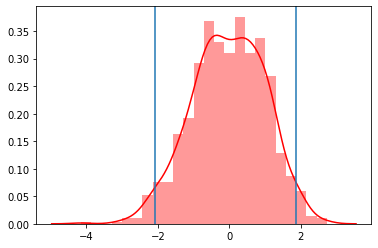

In [4]:
# Plot the random #'s using seaborn:
import seaborn as sns

# Using seaborn's distplot distrubution:
ax = sns.distplot(sample, color='r')

# 
ax.axvline(np.percentile(sample, 97.5), 0)
ax.axvline(np.percentile(sample, 2.5), 0);

## What is Inferential Statistics?

It cost a lot of money to pick up a telephone and asked every single person in the US who they are going to vote for. Sampling saves money and time by just drawing a random sample and calling a select number of people and ask them. Then draw a conculsion from that sample to get pretty close to how everyone will vote. 

Given a small sample we are able to infer some information about the population as a whole. 

Typically in an acedemic setting the word Statistics refers only to sample and the word Parameter refers to only to population.

![stats](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

When we talk about the **population parameters**: we use $\mu$ (the Greek letter mu) and $\sigma$ (the Greek letter sigma) for mean and standard deviation

When we talk about the sample **sample statistics**: we use $\bar{x}$ (the letter x bar) and s

    


## Hypothesis Testing (T-Tests)

There are actually 3 names that are commonly used for this.
- AB Testing
- Hypothesis Testing
- T-Testing

There are some slight difference between them but they can general be considered interchangable terms.

What is A/B testing?  
https://www.convertize.com/what-is-ab-testing/   
https://blog.hubspot.com/blog/tabid/6307/bid/20566/the-button-color-a-b-test-red-beats-green.aspx

#### 3 types of t-tests

The t-test is the process of looking at a sample and determining whether the differances in the sample reflect significate differences in the population.

There are three main types of t-test:  
-- An Independent Samples t-test compares the means for two groups.  
-- A Paired sample t-test compares means from the same group at different times.  
-- A One sample t-test tests the mean of a single group against a known mean.

#### T-Test Assumptions:  
1. The scale of measurement applied to the data collected follows a **continuous or ordinal scale**, such as the scores for an IQ test.  
2. The data is collected from a representative, **randomly selected portion** of the total population.  
3. The data, when plotted, results in a **normal distribution, bell-shaped distribution curve**.  
4. **A reasonably large sample size is used**. A larger sample size means the distribution of results should approach a normal bell-shaped curve.  
5. **Homogeneity of variance.** Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.  

In order to carry out a t-test you have to assume these things about your data. They may or may not be true but if you have at least reasonable doubt you have enough data to carry out a t-test.

If you don't at least have #3 your data will be skewed. You will still get results but they will not work out in reality. 

In [0]:
#### Example: sample data -- number of "conversions" (action) between two 
####   versions of a website, over 10 days
a=[1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]
b=[1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248]

In [6]:
# It looks like B produces more conversions!
print(sum(a))
print(sum(b))

11860
12220


In [7]:
# But does it REALLY? Is it worth the $$$ that I will invest? This is where 
#   AB testing comes in:
print(np.mean(a))
print(np.mean(b))
print(np.mean(a) - np.mean(b))

# There is a clear difference in the sample means!
# It's possible that even though I observe an apparent difference in the sample 
#   means that there is no TRUE difference in the population means.
# That is where t-testing comes into play.

1186.0
1222.0
-36.0


In [0]:
# What is the problem that t-testing is trying to solve?
# - We want to deetermine if there are differences in the population by looking
#   at the differences in the sample.
# - The way to tell if a sample is reliable is if it is RANDOM!

#### Generate a hypothesis
- **Null hypothesis:** website A has the same average conversion rate as website B meaning that there is no difference.
- **Alternative hypothesis (1-tailed):** website A has lower/higher average conversion rate than website B meaning you are able to tell with confidence whether or not the difference is truly lower or higher.
- **Alternative hypothesis (2-tailed):** website A has different average conversion rate than website B meaning that you don't know the directionality, you just know that there is a difference.

You are hoping to get to the Alternative hypothesis saying that you are confident that the sample data is an acurate way to predicit results.

In [0]:
# Import t-test indepenent for 2 indepenent samples:
from scipy.stats import ttest_ind

In [10]:
# Compare the 2 groups of websites tested:
ttest_ind(a,b)

# Both numbers you get are telling you the same thing. They're 2 diff. ways of
#   giving the same results.
# - Statistic = T-value = expressed in the metric of the original group.
# - Pvalue = expressed in a universal metric that is comparable across all 
#   possible tests. Usually the p-value is what ends up getting reported. A p-
#   value of less than 0.5 will always be considered meaningful. Above 0.5 will
#   result in the Null hypothesis.

Ttest_indResult(statistic=-2.2795770510504845, pvalue=0.03504505626727664)

In [0]:
# Interpret the p-value:

# The confidence interval is how confident you need to be that the results will
#   represent the population acurately.
# 95% confidence interval (alpha = .05) <-- the cut point is .05
# 99% confidence interval (alpha = .01)
# 99.9% confidence interval (alpha = .001)

In [0]:
# What about the t-statistic?
# This is the actual formula of how it is calculated:
# The difference in the mean for both groups divided by the varience over the 
#   square root of the number in the sample. 

![tstat](https://blog.minitab.com/hubfs/Imported_Blog_Media/formula_1t.png)

A common analogy is that the t-value is the signal-to-noise ratio.   
**The numerator is the signal.** You simply take the sample mean and subtract the null hypothesis value. As the difference between the sample mean and the null hypothesis mean increases in either the positive or negative direction, the strength of the signal increases.  
**The denominator is the noise.** The equation in the denominator is a measure of variability known as the standard error of the mean. This statistic indicates how accurately your sample estimates the mean of the population. A larger number indicates that your sample estimate is less precise because it has more random error.  
**Both the signal and noise values are in the units of your data.** If your signal is 6 and the noise is 2, your t-value is 3. This t-value indicates that the difference is 3 times the size of the standard error. However, if there is a difference of the same size but your data have more variability (6), your t-value is only 1. The signal is at the same scale as the noise.  
https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

#### Another example: pancakes



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



#### Our first 2-sample t-test (pancake example)
1) Null Hypothesis: (boring hypothesis)

𝑥¯1==𝑥¯2 

Or that the average cooking time between the two burners is the same.

2) Alternative Hypothesis: (the opposite of the null)

𝑥¯1≠𝑥¯2 

𝑥¯1−𝑥¯2≠0 
3) Confidence Level: The probability of seing a true result in spite of random variability. (How often do I want to make sure that I'm right.) Typically: 95%, 99%, 99.9%

In [13]:
# Sample 1
mu1 = 180 # Sample mean
sigma1 = 5 # Standard deviation
sample1 = np.random.normal(mu1, sigma1, 1000)
print (round(sample1[10], 2))
sample1[:10]

179.89


array([188.66924765, 174.90545919, 182.29317766, 180.28854889,
       172.80720675, 178.72521642, 174.76829203, 179.80331427,
       179.90370835, 176.82965717])

In [15]:
# Sample 2
mu2 = 178.5 # sample mean
sigma2 = 4.25 # standard deviation
sample2 = np.random.normal(mu2, sigma2, 800)
sample2[:10]

array([180.57042551, 179.52028894, 177.67336171, 170.29914289,
       175.37002179, 184.43064787, 182.10127117, 182.74966219,
       183.27939661, 182.60845991])

In [16]:
# Compare
results = ttest_ind(sample1, sample2)
results

Ttest_indResult(statistic=6.384783527991927, pvalue=2.1791926096404384e-10)

In [19]:
# What is the p-value? Can get just the pvalue with:
print (results.pvalue)

# You can also round the pvalue by adding round and the number of decimal places.
round(results.pvalue, 12)

2.1791926096404384e-10


2.18e-10

P-hackig = Really common in graduate school and acedemic research. When you want to find the lowest possible p-values, you just keep tweaking the numbers until you finally find some significant result. It's all BS because if you do it enough times you will always find it.

Some funny comics about p-hacking:

![p-hacking](https://external-preview.redd.it/vl78LyXZfQsQi3J_wcNGRgp1g2OVVhc807_NYcihCDM.jpg?auto=webp&s=cb887f187b4e7bf18923635c971ba0b82f26d4de)

![Data Threat](https://miro.medium.com/max/1400/0*nK8IFmV5N39sEij5.png)


4) T Statistic: A value that falls along a t-distribution.

A vertical bar that falls on our t-distribution
5) P-value: The p-value that we're interested in is (1-Confidence Level) or in our case: .05

The probability of getting this test result (t-statistic) due to random chance.

The probability of our null hypothesis being true.

6) Conclusions:

Due to observing a t-statistic of 8.9 and a resulting p-value of .00000000000000000109, we reject the null hypothesis that the cooking times of these two burners is the same, and suggest the alternative hypothesis, that they are different.

(Because our p-value was less than .05, we reject the null hypothesis).

In [0]:
# An unlikely sample (i.e. one that's in the tails) means that it is highly likely you have a true sig difference

# Why do we use the t-distribution in hypothesis tests?

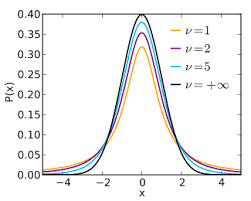

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

NameError: ignored

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

#### Get and prepare the data

In [0]:
# Imports
import pandas as pd
from scipy.stats import ttest_ind

In [0]:
# Mortgage sample of first time homebuyers with FHA loan in 2018:
url = 'https://raw.githubusercontent.com/austinlasseter/2018_fha_homebuyers/master/data/mortgage_sample.csv'

"17 percent of home-buyers in 2018 were single females"
* NAR Report: https://github.com/austinlasseter/2018_fha_homebuyers/blob/master/reports/FHA-Annual-Housing-Report-2019.pdf
* Data source: https://www.fhfa.gov/DataTools/Downloads/Pages/Public-Use-Databases.aspx
* Data dictionary: https://www.fhfa.gov/DataTools/Downloads/Documents/Enterprise-PUDB/National-File-A/2018_Single_Family_National_File_A.pdf

In [22]:
# Read in the dataset:
homes = pd.read_csv(url)
homes.head()

,record,enterprise,metro,tract_pct_minority,tract_income_ratio,borrower_income_ratio,ltv,loan_purpose,fed_guarantee,borrower_race,borrower_gender,coborrower_race,coborrower gender,units,affordability
0,696120,2,1,3,3,3,4,1,4,6,9,1,5,1,4
1,1043888,2,1,1,3,3,2,1,4,9,9,1,2,1,4
2,778619,2,1,2,2,3,4,1,4,5,9,1,5,1,4
3,85106,2,1,2,1,3,4,1,4,5,5,1,2,1,4
4,477652,2,1,3,2,3,4,1,4,9,7,1,2,1,4


In [23]:
# Size of the dataset:
homes.shape

(10000, 15)

In [0]:
# Filter income ratio for any values less than 9:
homes = homes[homes['borrower_income_ratio']<9]

Borrower Income Ratio    

The ratio of the borrower’s (or borrowers’) annual income to
the area median family income for the reporting year. 

1 = >= 0, <=50% (poor)   
2 = >50, <=80% (mid)   
3 = >80% (wealthy)    
9 = Not applicable  

In [25]:
# Look at results:
homes['borrower_income_ratio'].value_counts().sort_index()

1     694
2    1941
3    7364
Name: borrower_income_ratio, dtype: int64

In [26]:
# Recode this variable as binary using np.where:
homes['hi_income'] = np.where(homes['borrower_income_ratio']==3, 1, 0)
homes['hi_income'].value_counts().sort_index()

0    2635
1    7364
Name: hi_income, dtype: int64

In [27]:
# Second variable: loan to value:
homes['ltv'].value_counts().sort_index()

1    1713
2    4466
3     994
4    1986
5     839
9       1
Name: ltv, dtype: int64

In [0]:
# Drop the nines again because those are missing values:
homes=homes[homes['ltv']<9]

In [29]:
# Recode to look at just the lowest and highest ltv using .map:
homes['risk'] = homes['ltv'].map({1:0, 5:1})
homes['risk'].value_counts().sort_index()

0.0    1713
1.0     839
Name: risk, dtype: int64

In [30]:
# Crosstab for comparison:
compare = pd.crosstab(homes['hi_income'], homes['risk'], normalize='index')
compare

risk,0.0,1.0
hi_income,,
0,0.580897,0.419103
1,0.731979,0.268021


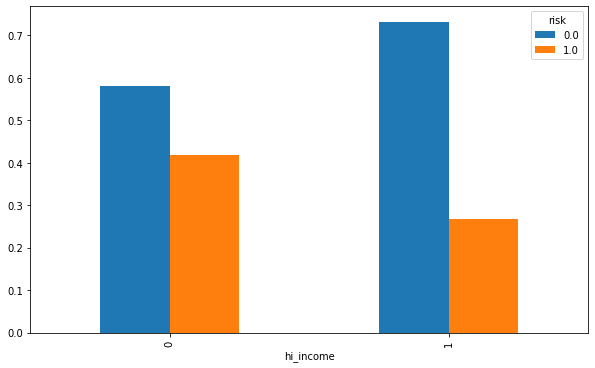

In [33]:
# Visualization using a bar chart:
compare.plot(kind='bar', figsize=(10,6));

# This is just a sample. Need to verify first that this it not just a fluke and 
#   does in fact represent the population as a whole. 

In [0]:
# State the null hypothesis!
# - There is no difference between average loan risk for hi and low income 
#   borrowers (risk is equal).

# State the alternative hypothesis!
# - Levels of between the 2 groups will differ.

In [35]:
# Carry out the ttest:
# First: What is the average loan risk of high and low income people?
homes.groupby('hi_income')['risk'].mean()

# Don't actually need to do this, just for learning purposes. The ttest will
#   automatically do it for you.

hi_income
0    0.419103
1    0.268021
Name: risk, dtype: float64

In [36]:
# Make 2 groups for comparison:
high = homes[homes['hi_income']==1]
low = homes[homes['hi_income']==0]
print(high.shape)
print(low.shape)

(7364, 17)
(2634, 17)


In [37]:
# Check out the means of the 2 groups:
print(high['risk'].mean())
low['risk'].mean()

0.26802096985583224


0.4191033138401559

In [38]:
# Final step: Run the ttest:
ttest_ind(high['risk'], low['risk'])

# You get nan because there is NaN values within the dataset.

Ttest_indResult(statistic=nan, pvalue=nan)

In [39]:
# Final step: Run the ttest:
# Need to add nan_policy='omit' to take out the missing values just for this test:
# nan_policy is exclusive to the scipy library.
ttest_ind(high['risk'], low['risk'], nan_policy='omit')

# You could drop all missing using .dropna too but that will drop it from your
#   dataset and you may want to use them later on. So the above is the better 
#   method to go with.
# These results tell us that it is highly likely that we have a True difference.
# Meaning that we can say with confidence that low income borrowers have a 
#   higher risk than high income borrowers. 

Ttest_indResult(statistic=-8.063860235763045, pvalue=1.1252180169878018e-15)

**get the data**  
https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
# The house of representatives must be representative data!
# This is not a very good sample because the author of this dataset just looked
#   at past voting records.
# Therefore this is not REALLY a random sample!

In [41]:
# Get data from .data table, it is an old format but still readable, just have
#   to add the headers to it:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-20 21:14:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2020-05-20 21:14:36 (271 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [42]:
# Make it into a dataframe:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']


house = pd.read_csv('house-votes-84.data', header=None, names=column_headers)
house.head()


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [43]:
# Make it into a dataframe:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

# You can see right away that the missing values were coded with a ?. To remove
#   those and set them to NaN values, need to add na_values='?':
house = pd.read_csv('house-votes-84.data', header=None, names=column_headers, 
                    na_values='?')
house.head()


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [52]:
# Recode votes as numerical values so you can carry out comparisons:
house = house.replace({'y':1, 'n':0})
house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [53]:
# How many from each party?
house['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
# How did Republicans vote?
rep = house[house['party']=='republican']

In [0]:
# How did Democrats vote?
dem = house[house['party']=='democrat']

In [56]:
# The percentage of republicans who voted "yes" (1) on the right to sue bill:
rep['right-to-sue'].sum()/len(rep)

# len() is counting NaN values too!

0.8095238095238095

In [57]:
# Remove NaN values from this column
col = rep['right-to-sue']

np.isnan(col)

right_to_sue_no_nans = col[~np.isnan(col)]

# The same column as before, but I've dropped the NaN values
right_to_sue_no_nans

right_to_sue_no_nans.sum()/len(right_to_sue_no_nans)


0.8607594936708861

In [60]:
# Average rate of voting 'yes' on the right to sue:
print(rep['right-to-sue'].mean())
dem['right-to-sue'].mean()

0.8607594936708861


0.2896825396825397

In [61]:
# There's a BIG difference in the sample, does this reflect a TRUE difference in 
#   the population?
ttest_ind(rep['right-to-sue'], dem['right-to-sue'], nan_policy='omit')

Ttest_indResult(statistic=13.51064251060933, pvalue=1.2278581709672758e-34)

In [0]:
# We REJECT the null hypothesis.
# We ACCEPT the alt hypo because there is a significant difference in the 
#   population between dems and reps on this issue.

#### water project bill (two-sample t-test)

1) Null Hypothesis: There is no difference between average voting rates (levels of support) for the water-project bill between democrats and republicans in the house of representatives. (support is equal)

𝑥¯1==𝑥¯2 
Where  𝑥¯1  is the mean of republican votes and  𝑥¯2  is the mean of democrat votes.

2) Alternative Hypothesis:

𝑥¯1≠𝑥¯2 
Levels of support between the two parties will differ in the population.

3) 95% Confidence Level

In [63]:
# What is the mean support of Republicans?
rep['water-project'].mean()

0.5067567567567568

In [64]:
# What is the mean support of Democrats?
dem['water-project'].mean()

0.502092050209205

In [65]:
# Compare with a t-test:
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

# This is a Null hypthesis because there is no True difference in the population.

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

When I have multiple samples (using a 2-sample t-test) I will use the smaller of the two samples to determine my degrees of freedom

So in this case, df = 148-1 = 147

4) T-statistic: .089

5) P-value: .929

I want to reject the null hypothesis if my p-value is < .05 or if my p-value is less than (1-confidence_level)

Conclusion: due to a p-value of .929 I fail to reject the null hypothesis that republican and democrat support for the water-project bill is different.

I never say that I "accept" the null hypothesis, I just say that I "fail to reject"

#### 1-sample T-test example

I'm only using one sample, and my null hypothesis will be different.

We're looking at Democrat support of the South-Africa bill

1a) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == 1.

This says that 100% of democrats support this bill. Full support.

1b) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

1c) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == 0.

This says that 0% of democrats support this bill. The party is against the bill.

1d) Null Hypothesis:

𝑥¯1  (average dem support for SA bill) == .78245

This says that 0% of democrats support this bill. The party is against the bill.

**With 1-sample t-tests I can frame that I'm asking through my choice of null hypothesis**

1) Null Hypothesis:  𝑥¯1  (average dem support for SA bill) == .5

This says that 50% of democrats support this bill. The party is split.

2) Alternative Hypothesis: Support is not equal to .5 or 50%

𝑥¯1  (average dem support for SA bill)  ≠  .5

This says nothing about if support is greater than or less than 50%, it's just saying that it's not 50% - it's different, it's something other than 50%.

3) Confidence Level: 95%

In [0]:
# Need to import ttest_1samp = 1 sample for this one since we are only doing
#   one group.
from scipy.stats import ttest_ind, ttest_1samp

In [67]:
# Conduct the t-test on only dem group:
ttest_1samp(dem['south-africa'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=23.965755112488182, pvalue=1.7513759267849718e-58)

Due to a p-value of (basically 0) we reject the null hypothesis that democrat support for the South Africa bill is .5 (split party) and conclude that it is something different.


In [68]:
# What is the average support among Democrats?
dem['south-africa'].mean()

0.9351351351351351

In [69]:
# Is it significantly different from 90%?
ttest_1samp(dem['south-africa'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=1.935123083617057, pvalue=0.05450836316336539)

Fail to reject the null hypothesis:

I conclude that that democrat support for the South Africa bill is not significantly different from 90%.

In [0]:
# what about 89.9?
ttest_1samp(dem['south-africa'], .899, nan_policy='omit')

Ttest_1sampResult(statistic=1.9901996636892347, pvalue=0.048049640325191705)

Due to a p-value of .048, I reject the null hypothesis that democrat support for this bill is 89.9% and suggest the alternative that it is different from 89.9%

### Wine Example

In [0]:
# Load the data (wines from Italy)
from sklearn.datasets import load_wine
X = load_wine()

In [0]:
# Put that into a dataframe
import pandas as pd
wine=pd.DataFrame(X['data'], columns=X['feature_names'])
wine['origin']=X['target']

In [73]:
# Take a look at the dataframe:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


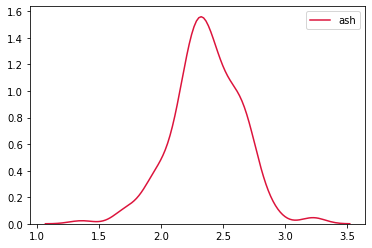

In [74]:
# Examine a column ash for all 3 origin groups:
import seaborn as sns
sns.kdeplot(wine['ash'], color='crimson');

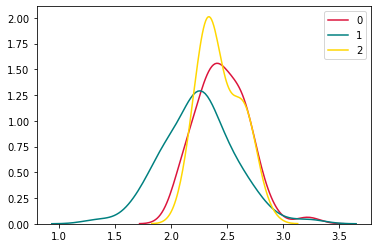

In [75]:
# Now for each group. Are these groups different or the same?
colorlist=['crimson', 'teal', 'gold']
for x in [0,1,2]:
    sns.kdeplot(wine[wine['origin']==x]['ash'], color=colorlist[x], label=x);

In [76]:
# Are they different or the same?
for x in [0,1,2]:
    print(wine[wine['origin']==x]['ash'].mean())
    print(wine[wine['origin']==x]['ash'].std())
    print('\n')

2.455593220338984
0.2271659820517139


2.244788732394365
0.31546726864369473


2.4370833333333333
0.1846901756805375




In [0]:
# Create two selections from the larger sample:
ash1 = wine[wine['origin']==1]['ash']
ash2 = wine[wine['origin']==2]['ash']

In [0]:
# Compare samples 0 and 1. do they have the same ash content in the soil?
stat, pvalue = ttest_ind(ash1, ash2)

In [79]:
# Is the pvalue less than 0.05?
pvalue <= 0.05

True

#### Alcohol content

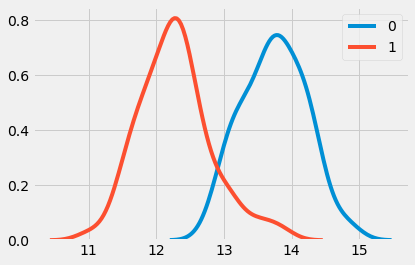

In [0]:
# compare mean alcohol for two origin groups
for group in range(0,2):
    sns.kdeplot(wine[wine['origin']==group]['alcohol'], label=group)

In [0]:
# create the groups
group1=wine[wine['origin']==0]['alcohol']
group2=wine[wine['origin']==1]['alcohol']

In [0]:
# run the t-test and interpret the p-value
stat, pvalue = ttest_ind(group1, group2)

In [0]:
# format so it's not in scientific notation
print('{:.15f}'.format(pvalue))

0.000000000000000


#### Same analysis, on hue

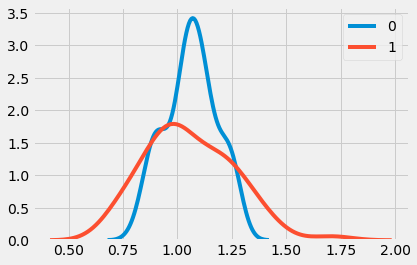

In [0]:
for group in range(0,2):
    sns.kdeplot(wine[wine['origin']==group]['hue'], label=group)

In [0]:
# create the groups
group1=wine[wine['origin']==0]['hue']
group2=wine[wine['origin']==1]['hue']

In [0]:
# run the t-test
stat,pvalue=ttest_ind(group1, group2)
print(pvalue<=0.05)

False


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means